# Business understanding
- The goal is to predict if a customer will churn. since the target variable is binary ('STAY' / 'LEAVE'), this means that this is a binary classfication problem. SO we will try to answer the following questions : 
    - What is the probability of an actual customer to leave the company ?
    - What are the indicators of a customer leaving the company ?
    
- The dataset presents different features of past customers like thir house's value, their Data consumption etc.
- we will start by analyzing the features, their distribution and their correlation, preprocessing them and then implementing a binary classfication model to get the predictions for an unseen data.

# Data understanding
To understand the Data we will proceed with an exploratory analysis to get insights from the Data.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
from sklearn.metrics import roc_curve, accuracy_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt 
from sklearn.preprocessing import Imputer
import seaborn as sns
%matplotlib inline

### Load the Data :

In [2]:
# Load the data
train = pd.read_csv('/home/fatimazahra/Téléchargements/Churn_case_study/training.csv')
test = pd.read_csv('/home/fatimazahra/Téléchargements/Churn_case_study/validation.csv')

print("Shape of training set {}".format(train.shape))
print("Shape of test set {}".format(test.shape))

Shape of training set (11981, 19)
Shape of test set (3993, 18)


In [3]:
train.head()

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURNED
0,C100000,zero,660.000000,19995.0,0,0,897338.0,False,4,3,160.0,155,1,1.2,15,very_unsat,little,considering,STAY
1,C100001,one,317.647059,31477.0,155,15,393396.0,True,0,1,100.0,245,27,2.7,4,unsat,little,considering,LEAVE
2,C100006,zero,208.695652,66742.0,0,13,937197.0,False,4,2,127.0,493,20,2.6,4,avg,very_little,considering,STAY
3,C100008,zero,265.017668,40864.0,183,0,986430.0,False,3,3,86.0,390,13,2.5,12,unsat,very_high,considering,LEAVE
4,C100010,one,440.000000,43321.5,200,0,394622.0,True,2,3,77.0,175,18,2.4,10,very_unsat,little,actively_looking_into_it,LEAVE


There are 18 features that we will use to explain the target variable 'CHURNED'

### Exploration Data Analysis : 
First of all, we will check the missing values and the type of each feature in the dataset

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11981 entries, 0 to 11980
Data columns (total 19 columns):
CUSTOMER_ID                    11981 non-null object
COLLEGE                        11981 non-null object
DATA                           11981 non-null float64
INCOME                         11981 non-null float64
OVERCHARGE                     11981 non-null int64
LEFTOVER                       11981 non-null int64
HOUSE                          11346 non-null float64
LESSTHAN600k                   11346 non-null object
CHILD                          11981 non-null int64
JOB_CLASS                      11981 non-null int64
REVENUE                        11981 non-null float64
HANDSET_PRICE                  11981 non-null int64
OVER_15MINS_CALLS_PER_MONTH    11981 non-null int64
TIME_CLIENT                    11981 non-null float64
AVERAGE_CALL_DURATION          11981 non-null int64
REPORTED_SATISFACTION          11981 non-null object
REPORTED_USAGE_LEVEL           11981 non-null

- HOUSE and LESSTHAN600k attributes have only 11346 non-null values meaning that 635 values are missing. (We will take care of this later)
- Features with Object type are categorical features.

In [5]:
# Check the summary of the numerical attributes.
train.describe()

,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION
count,11981.000000,11981.000000,11981.000000,11981.000000,11346.000000,11981.000000,11981.000000,11981.000000,11981.000000,11981.000000,11981.000000,11981.000000
mean,503.625376,47595.943703,80.185460,23.785577,506521.681650,2.070194,2.508639,155.541941,383.495868,7.540356,3.079250,5.972957
std,457.156513,22293.736749,84.587419,26.680037,256808.319571,1.249974,1.120546,47.905580,210.601172,8.768863,1.650221,4.361189
min,0.000000,10032.500000,-2.000000,0.000000,150015.000000,0.000000,1.000000,50.000000,130.000000,0.000000,0.300000,1.000000
25%,181.818182,29367.000000,0.000000,0.000000,268511.250000,1.000000,2.000000,121.000000,217.000000,1.000000,1.900000,2.000000
50%,360.995851,44992.500000,56.000000,15.000000,469775.500000,2.000000,3.000000,149.000000,322.000000,4.000000,2.700000,5.000000
75%,685.714286,65078.000000,171.000000,41.000000,722464.250000,3.000000,4.000000,182.000000,515.000000,13.000000,3.800000,9.000000
max,6600.000000,105355.500000,298.000000,89.000000,999996.000000,7.000000,4.000000,521.000000,899.000000,29.000000,21.000000,15.000000


Let's check the distribution of numeric variables.

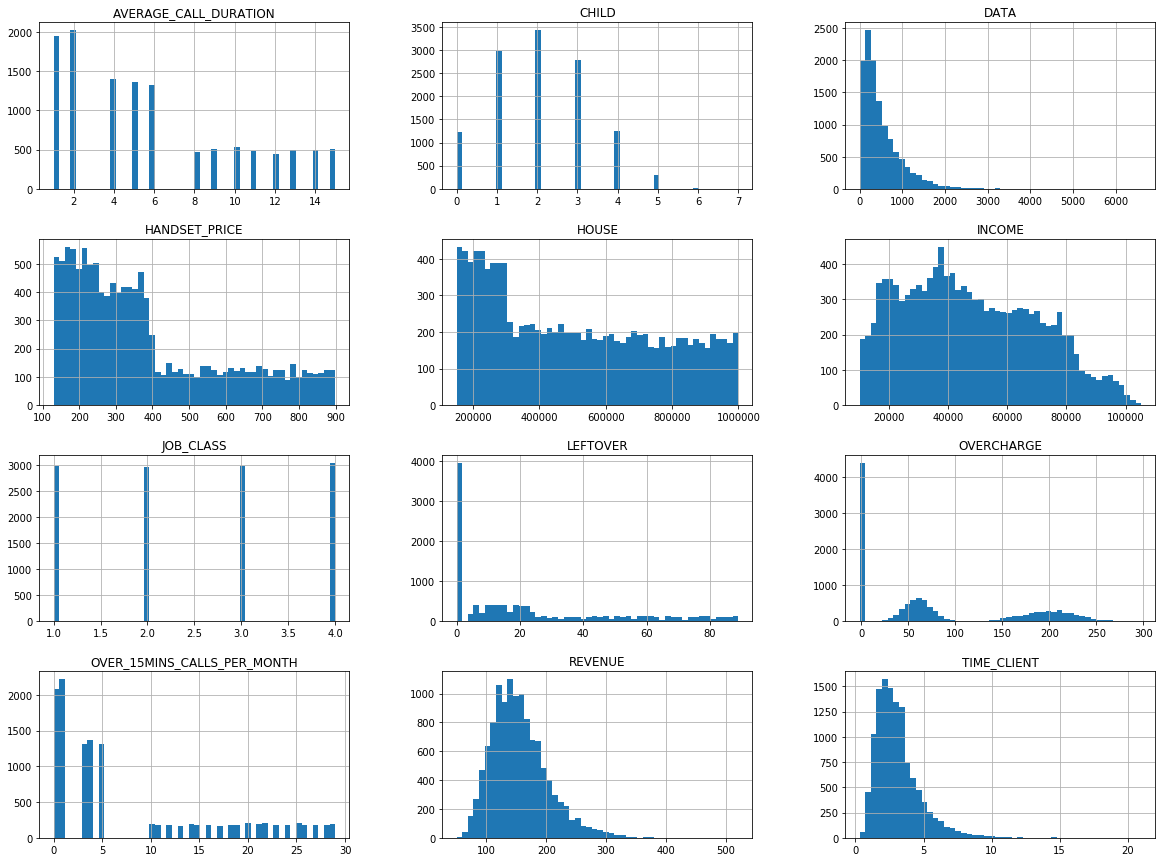

In [6]:
train.hist(bins = 50, figsize = (20,15))
plt.show()

- JOB_CLASS is equally distributed over all classes.
- The variables have very different scales.
- Some histograms are right-skewed (eg : REVENUE, TIME_CLIENT, DATA)

Check the distribution of the target variable 'CHURNED'

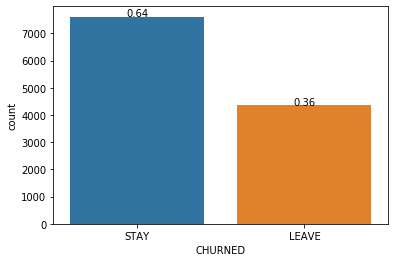

In [7]:
# create a copy of the training set
train_eda = train.copy()
ax = sns.countplot(x = "CHURNED", data = train_eda)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/float(len(train_eda))),
            ha="center") 

There is 64% of non churned customers et 36% of churned customers. Hence this is an imbalanced class problem. That's why it is interesting to use AUC_ROC as a metric for the evaluation step.

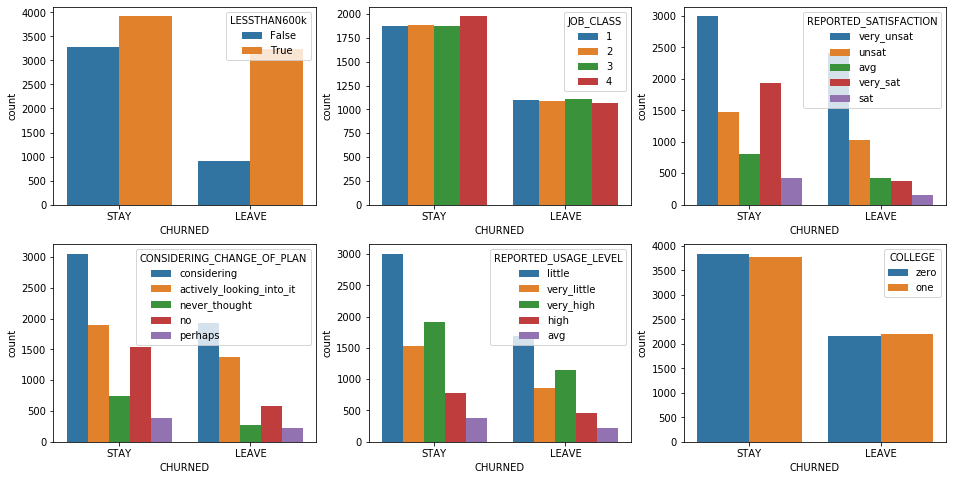

In [8]:
fig, axes = plt.subplots(2, 3 ,figsize = (16,8))


sns.countplot(x = 'CHURNED', hue = 'LESSTHAN600k', data = train_eda, ax = axes[0,0])
sns.countplot(x = 'CHURNED', hue = 'JOB_CLASS', data = train_eda, ax = axes[0,1])
sns.countplot(x = 'CHURNED', hue = 'REPORTED_SATISFACTION', data = train_eda, ax = axes[0,2])

sns.countplot(x = 'CHURNED', hue = 'CONSIDERING_CHANGE_OF_PLAN', data = train_eda, ax = axes[1,0])
sns.countplot(x = 'CHURNED', hue = 'REPORTED_USAGE_LEVEL', data = train_eda, ax = axes[1,1])
sns.countplot(x = 'CHURNED', hue = 'COLLEGE', data = train_eda, ax = axes[1,2])

- The customers which are highly overcharged churn.
- There is no discernable strong correlation correlation between JOB_CLASS, COLLEGE and churn.
- The data indicates that the largest propotion of customers had a house's value less than 600k.
- Most customers are very unsatified and consider changing the operator whether they churn or not.
- Most customers reported a little usage level.

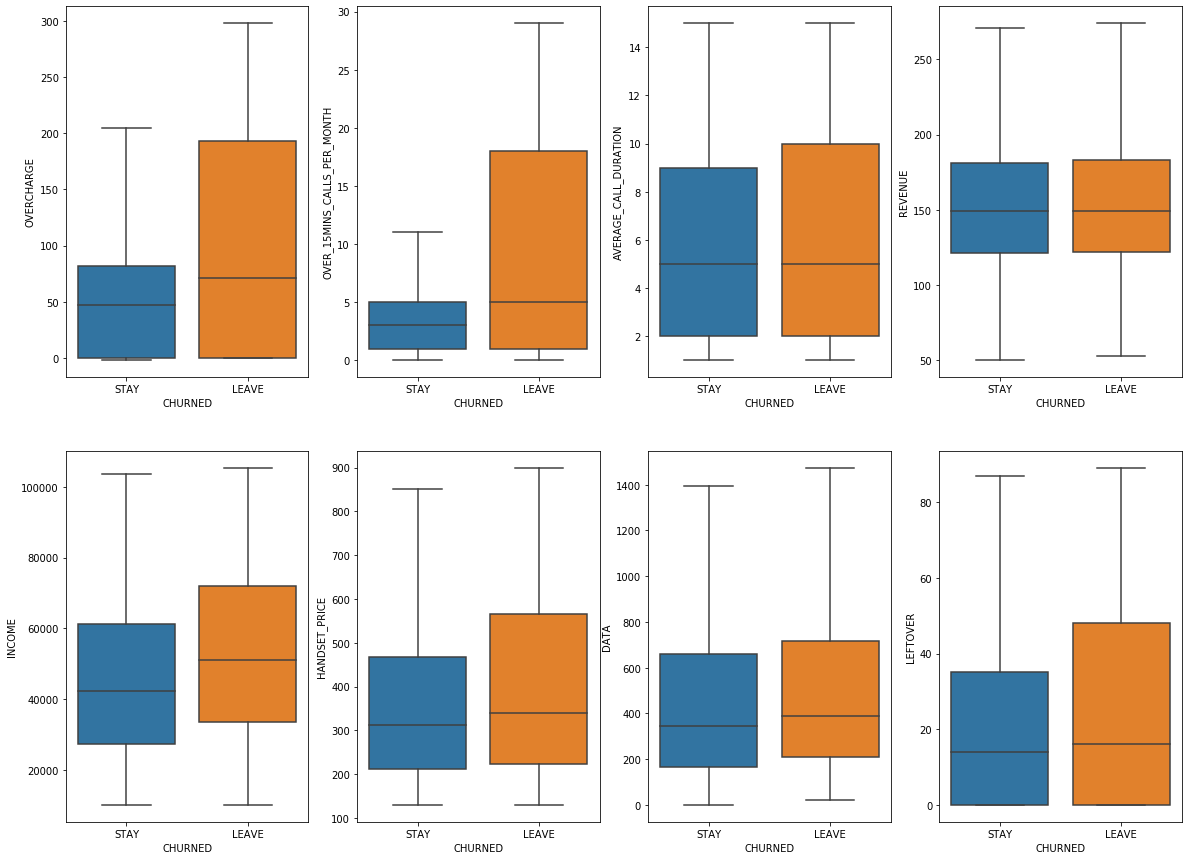

In [9]:
fig, axes = plt.subplots(2, 4 ,figsize = (20,15))

sns.boxplot(x = 'CHURNED', y = 'OVERCHARGE', data = train_eda, sym = "", ax = axes[0,0])
sns.boxplot(x = 'CHURNED', y = 'OVER_15MINS_CALLS_PER_MONTH', data = train_eda, sym = "", ax = axes[0,1])
sns.boxplot(x = 'CHURNED', y = 'AVERAGE_CALL_DURATION', data = train_eda, sym = "", ax = axes[0,2])
sns.boxplot(x = 'CHURNED', y = 'REVENUE', data = train_eda, sym = "", ax = axes[0,3])

sns.boxplot(x = 'CHURNED', y = 'INCOME', data = train_eda, sym = "", ax = axes[1,0])
sns.boxplot(x = 'CHURNED', y = 'HANDSET_PRICE', data = train_eda, sym = "", ax = axes[1,1])
sns.boxplot(x = 'CHURNED', y = 'DATA', data = train_eda, sym = "", ax = axes[1,2])
sns.boxplot(x = 'CHURNED', y = 'LEFTOVER', data = train_eda, sym = "", ax = axes[1,3])


- Customers with high overcharge and a high number of long phone calls are more likely to churn.
- On average, churned customers have the highest income, overcharge and long phone call.

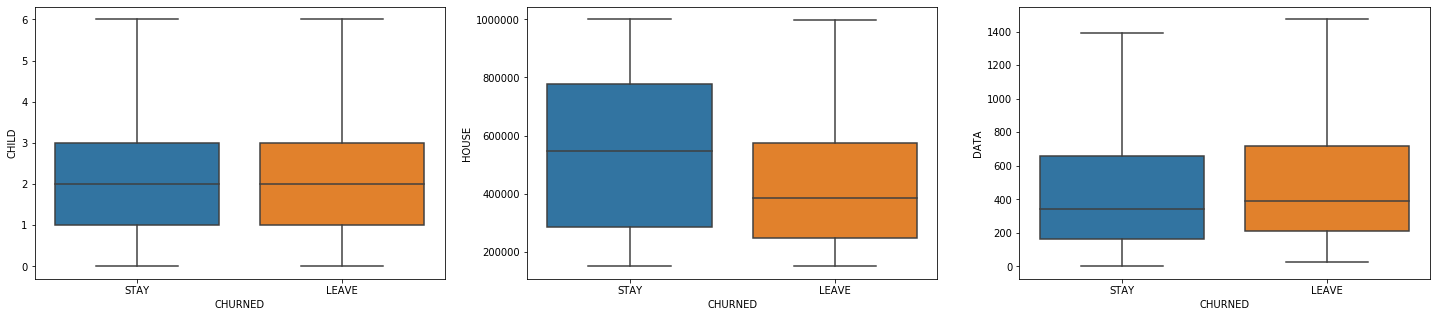

In [10]:
fig, axes = plt.subplots(1, 3 ,figsize = (25,5))

sns.boxplot(x = 'CHURNED', y = 'CHILD', data = train_eda, sym = "", ax = axes[0])
sns.boxplot(x = 'CHURNED', y = 'HOUSE', data = train_eda, sym = "", ax = axes[1])
sns.boxplot(x = 'CHURNED', y = 'DATA', data = train_eda, sym = "", ax = axes[2])

- There is no strong correlation between number of children, Data consumption and churn.
- Churned customers own the cheapest houses.

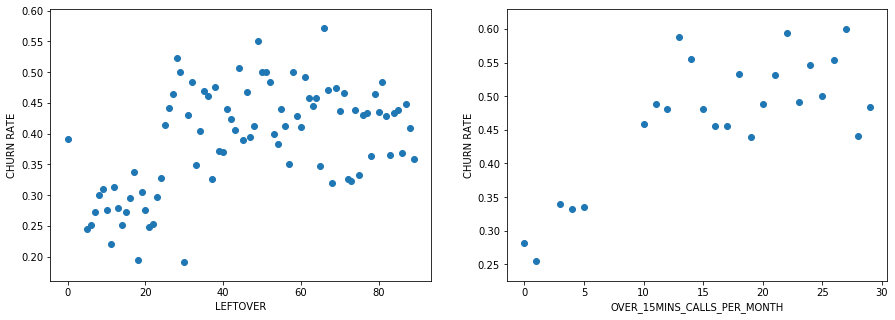

In [11]:
train_eda = train.copy()
fig, axes = plt.subplots(1, 2 ,figsize = (15,5))

train_eda['CHURNED'] = (train_eda['CHURNED'].values == 'LEAVE').astype(float)
df_plot_1 = train_eda.groupby('LEFTOVER').CHURNED.mean()
axes[0].scatter(df_plot_1.index.values,df_plot_1.values)
axes[0].set_xlabel('LEFTOVER')
axes[0].set_ylabel('CHURN RATE')


df_plot_2 = train_eda.groupby('OVER_15MINS_CALLS_PER_MONTH').CHURNED.mean()
axes[1].scatter(df_plot_2.index.values,df_plot_2.values )
axes[1].set_xlabel('OVER_15MINS_CALLS_PER_MONTH')
axes[1].set_ylabel('CHURN RATE')

plt.show()

- It's clear that the higher leftover means higher Churn Rate, same goes for the number of long calls.

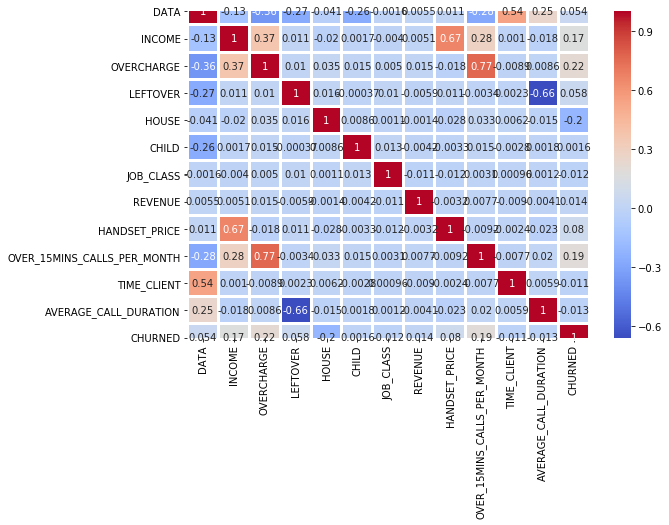

In [12]:
# Let's check correlation
fig, ax = plt.subplots()
fig.set_size_inches(9,6)
sns.heatmap(train_eda.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

- People who consume a lot of Data have less children, less overcharges,less leftovers, less phone calls and a high tenure.
- Customer with higher income tend to cosume less DATA, have high overcharge and long phone calls and an expensive handset.
- People with expensive houses consume less DATA.
- Customers with high average call duration have less leftover minutes.
- Churn is correlated positively to the income and the overcharge and negatively correlated to the house's values.

# Data Preparation : 
### Dropping uncessary features:
Before we start the data preparation, we will create a copy so we don't harm the original Data and drop the target variable and CUSTOMER ID variable.

In [13]:
train_pre = train.copy()
y_train = (train_pre['CHURNED'].values == 'LEAVE').astype(float)
train_pre.drop(columns = ['CUSTOMER_ID', 'CHURNED'], inplace = True)

### Fill missing values
we will fill the mssing values with the median.

In [14]:
def get_num_att(x_train):
    """
    return the numerical attributes in the dataframe
    
    x_train : DataFrame
    """
    # Get numerical and categorical attributes, each need a specific handling
    num_attribs = x_train.select_dtypes(include=[np.number]).columns.values
    train_num = x_train[num_attribs]
    return train_num



def fill_missing_val(train_num):
    """
    Fill the missing values with the median
    
    train_num : Dataframe with only numerical attributes
    """
    X_num = imputer.transform(train_num)
    train_tr = pd.DataFrame(X_num, columns=train_num.columns)
    return train_tr

In [15]:
train_num = get_num_att(train_pre)
# Fill missing values with median
imputer = Imputer(strategy = 'median')
imputer.fit(train_num)
train_tr = fill_missing_val(train_num)
# check num of missing 
train_tr.isnull().sum()

/home/fatimazahra/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


DATA                           0
INCOME                         0
OVERCHARGE                     0
LEFTOVER                       0
HOUSE                          0
CHILD                          0
JOB_CLASS                      0
REVENUE                        0
HANDSET_PRICE                  0
OVER_15MINS_CALLS_PER_MONTH    0
TIME_CLIENT                    0
AVERAGE_CALL_DURATION          0
dtype: int64

### Encode categorical variables:
therie 2 types of categorical variables in the dataset, binary and ordinal :
- For the binary like 'COLLEGE' we will encode with 1 for 'ONE' and 0 for 'ZERO'.
- For the oridinal variable like 'REPORTED_SATISFACTION', we will encode it with 0,1,...,n_classes-1 in order to keep the oridinal relation between the different instances of th variable, for example : 'REPORTED_SATISFACTION' has 5 instances :  'very_unsat', 'unsat', 'avg', 'sat', 'very_sat', the result of the encoding is the following : 
    - 'very_unsat' : 0
    - 'unsat' : 1
    - 'avg' : 2
    - 'sat' : 3
    - 'very_sat' : 4

In [16]:
def encode_and_fill_cat(x_train, train_tr):
    """
    Encode the categorical attributes
    
    x : The Dataframe containing all the features (categorical and numeric)
    train_tr : The daframe with preprocessed numeric attributes
    """
    cat_attribs = x_train.select_dtypes(exclude=[np.number]).columns.values
    train_cat = x_train[cat_attribs]
    # Fill the variable LESSTHAN600k according to HOUSE's value
    train_cat.loc[:,'LESSTHAN600k'] = (train_tr['HOUSE'] > 600000).values
    # Encode CHURNED and COLLEGE
    train_cat.loc[:,'COLLEGE'] = (train_cat['COLLEGE'] == 'one').astype(float)
    train_cat.loc[:,'LESSTHAN600k'] = train_cat.loc[:,'LESSTHAN600k'].astype(float)
    # Encode ORDINAL VARIABLE
    categories = pd.Categorical(train_cat['REPORTED_SATISFACTION'], 
                                categories=['very_unsat', 'unsat', 'avg', 'sat', 'very_sat'], ordered=True)
    labels, unique = pd.factorize(categories, sort=True)
    train_cat.loc[:,'REPORTED_SATISFACTION'] = labels
    #########################################################
    categories = pd.Categorical(train_cat['REPORTED_USAGE_LEVEL'], 
                                categories=['very_little', 'little', 'avg', 'high', 'very_high'], ordered=True)
    labels, unique = pd.factorize(categories, sort=True)
    train_cat.loc[:,'REPORTED_USAGE_LEVEL'] = labels
    ########################################################
    categories = pd.Categorical(train_cat['CONSIDERING_CHANGE_OF_PLAN'], 
                                categories=['actively_looking_into_it', 'considering', 'perhaps', 'no', 'never_thought'], ordered=True)
    labels, unique = pd.factorize(categories, sort=True)
    train_cat.loc[:,'CONSIDERING_CHANGE_OF_PLAN'] = labels
    return train_cat

In [17]:
train_cat = encode_and_fill_cat(train_pre, train_tr)
# check missing values and encoded var
print("------- Check encoded variables -------")
print(train_cat.info())
print("-------- Check missing values --------")
print(train_cat.isnull().sum())

------- Check encoded variables -------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11981 entries, 0 to 11980
Data columns (total 5 columns):
COLLEGE                       11981 non-null float64
LESSTHAN600k                  11981 non-null float64
REPORTED_SATISFACTION         11981 non-null int64
REPORTED_USAGE_LEVEL          11981 non-null int64
CONSIDERING_CHANGE_OF_PLAN    11981 non-null int64
dtypes: float64(2), int64(3)
memory usage: 468.1 KB
None
-------- Check missing values --------
COLLEGE                       0
LESSTHAN600k                  0
REPORTED_SATISFACTION         0
REPORTED_USAGE_LEVEL          0
CONSIDERING_CHANGE_OF_PLAN    0
dtype: int64


In [18]:
# Join the prerocessed Data
concat_train = pd.concat([train_cat, train_tr], axis = 1)

### Feature scaling (Standarisation) : 
We first substract the mean value (zero mean), and then we divide by the variance so that the resulting distribution has unit variance.

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(concat_train)
ready_train = scaler.transform(concat_train)

# Modeling
### Model selection :
We will try the following models and select the one that gives the best result.
- K-nearest nighbor
- Logistic regression
- Random Forest
- Gradient Boosting classifier
Given that we have a relativelly small dataset, we are going to use tha cross  validation methid for the validation step.

In [20]:
def train_and_val(model, x_train, y_train):
    
    """
    return the validation and training AUC_ROC score for a specific model.
    
    model : a binary classification model to train and validate
    x_train : preprocessed input features
    y_train : target variable y = 'CHURNED'
    """
    
    model.fit(x_train, y_train)
    y_pred_prob = model.predict_proba(x_train)
    sc_train = roc_auc_score(y_train, y_pred_prob[:,1])
    
    # Validation using cross validation - 10 folds
    sc_cv_val = cross_val_score(model, x_train, y_train, scoring='roc_auc', cv=10)
    
    return sc_train,  sc_cv_val.mean()

In [21]:

dict_ml = {'KNN' : KNeighborsClassifier(),
           'logistic regression' : LogisticRegression(),
           'Random Forest' : RandomForestClassifier(),
           'GradientBoostingClassifier' : GradientBoostingClassifier()}

for model in  dict_ml.keys():
    print(model)
    sc_train,  sc_val = train_and_val(dict_ml[model], ready_train, y_train)
    print("sc_train :", sc_train)
    print("sc_val:", sc_val)
    print("-------")

KNN
sc_train : 0.8782524749504071
sc_val: 0.735048030466764
-------
logistic regression
sc_train : 0.7747043103449313
sc_val: 0.773261918976355
-------
Random Forest
sc_train : 0.9993934779348168
sc_val: 0.8106776565947598
-------
GradientBoostingClassifier
sc_train : 0.8771433192606342
sc_val: 0.8542059818148658
-------


The best validation score (AUC_ROC) was obtained with Gradient boosting algorithm (85%) , Random Forest has a good validation AUC ROC 80% but since the trainining metric is 99%, it means that there a severe overfitting. KNN and Logistic regression give a lower RAO AUC.

We will keep working with Gradient Boosting algorithm and we will try to fine tune its hyperparameters in order to get a better value of AUC_ROC.

### Fine tuning the model with RandomSearch:
We will use RandomizedSearchCV class to find the best set of hyperparameters, It evaluates a given number of random combinations by selecting a random value for each hyperparameterat every iteration.

In [69]:
hyper_param = { 'n_estimators' : sp_randInt(100, 1000),
              'max_depth'    : sp_randInt(2, 10)}
GBCT = GradientBoostingClassifier()

randSearch = RandomizedSearchCV(GBCT, hyper_param, scoring= 'roc_auc', return_train_score = True, n_jobs=-1)
randSearch.fit(ready_train, y_train)

####################################################################################################""
cvres = randSearch.cv_results_ 
for mean_score_train, mean_score_val, params in zip(cvres["mean_train_score"], cvres["mean_test_score"], cvres["params"]):
    print(mean_score_train, mean_score_val, params)

1.0 0.8657883921705218 {'max_depth': 8, 'n_estimators': 882}
0.9944937148401228 0.8642962113466938 {'max_depth': 6, 'n_estimators': 175}
0.9187262698415878 0.8629853090254894 {'max_depth': 2, 'n_estimators': 893}
0.9004955673115805 0.8599632090111086 {'max_depth': 3, 'n_estimators': 160}
1.0 0.8638081344292367 {'max_depth': 9, 'n_estimators': 450}
0.9615675625299379 0.8647215889727151 {'max_depth': 3, 'n_estimators': 708}
0.995088426715844 0.8628194860854657 {'max_depth': 5, 'n_estimators': 353}
1.0 0.8618516081510151 {'max_depth': 9, 'n_estimators': 237}
1.0 0.8606852922307212 {'max_depth': 9, 'n_estimators': 209}
1.0 0.8652049987540655 {'max_depth': 9, 'n_estimators': 820}


Given the results above, the best set of parameters that takes into consideration the trade-off between overfitting/underfitting is max_depth = 3 and n_estimators = 160. The combinations (max_depth = 2,n_estimators = 893) and (max_depth = 3,n_estimators = 708) give a similar result but we prefer to go with a simpler model.

### Train the selected model
After fixing the set of hyperparameters to use, we are going to train the model on the whole training Data.

In [22]:
GBCT_final = GradientBoostingClassifier(max_depth=3, n_estimators=160)
GBCT_final.fit(ready_train, y_train)

y_pred = GBCT_final.predict(ready_train)
y_scores = GBCT_final.predict_proba(ready_train)

### Compute feature importance

In [23]:
feature_importance = GBCT_final.feature_importances_
features = concat_train.columns.values

sorted(zip(feature_importance, features), reverse=True)

[(0.2180379240118028, 'DATA'),
 (0.2044290694861269, 'OVERCHARGE'),
 (0.12237895443877603, 'HOUSE'),
 (0.10635538519682886, 'REPORTED_SATISFACTION'),
 (0.09730977228665567, 'LEFTOVER'),
 (0.08905395747540433, 'INCOME'),
 (0.08495710845274554, 'TIME_CLIENT'),
 (0.01942194204017252, 'CONSIDERING_CHANGE_OF_PLAN'),
 (0.01748758879654031, 'OVER_15MINS_CALLS_PER_MONTH'),
 (0.01614037514483848, 'CHILD'),
 (0.01583637873545368, 'HANDSET_PRICE'),
 (0.0029859811948563693, 'LESSTHAN600k'),
 (0.0020707233703730512, 'AVERAGE_CALL_DURATION'),
 (0.0016158626798194054, 'REVENUE'),
 (0.000820664164976147, 'REPORTED_USAGE_LEVEL'),
 (0.0007461113379410464, 'JOB_CLASS'),
 (0.0003522011866888996, 'COLLEGE')]

We can see that the most important features used in the implemented model for the prediction of the target variable CHURNED are : 
- DATA, OVERCHARE, HOUSE and REPORTED_SATISFACTION.

and the less important features are  : 
- COLLEGE, JOB_CLASS, REPORTED_USAGE_LEVEL and REVENUE.

# Evalution :
Now that we trained the model on the whole training data, we will evaluate the results and analyze the prediction errors.

### Compute AUC, precision and recall on the training set

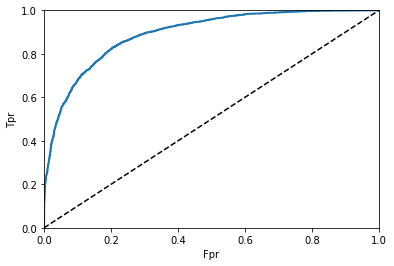

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      7612
         1.0       0.79      0.69      0.73      4369

    accuracy                           0.82     11981
   macro avg       0.81      0.79      0.80     11981
weighted avg       0.82      0.82      0.82     11981

--------------------
roc_auc :  0.8923347259696566


In [24]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores[:,1])
plt.plot(fpr, tpr, linewidth = 2, label = None)
plt.plot([0,1], [0,1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.show()

cm = confusion_matrix(y_train, y_pred)



print (classification_report(y_train, y_pred))
print("--------------------")
print("roc_auc : ",roc_auc_score(y_train, y_scores[:,1]))

- We can notice that the ROC_AUC the training set is equal to 0.89 which is sufficient value for this classification task.
- The model is correct 79% and can detect 69% of the churned cutomers.

### Prediction on the test set
Now let's run the model on the test to get predictions.

In [25]:
test.head()

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN
0,C100002,one,80.000000,45452.5,75,65,342741.0,True,3,1,149.0,300,3,2.2,2,unsat,little,considering
1,C100003,zero,536.842105,40703.5,90,0,215904.0,True,1,1,176.0,384,4,2.4,13,unsat,very_high,actively_looking_into_it
2,C100004,zero,256.578947,35563.0,52,0,341828.0,True,2,3,124.0,371,5,2.3,12,very_sat,avg,considering
3,C100005,zero,466.666667,66072.5,0,8,257222.0,True,3,1,279.0,324,1,2.8,5,very_sat,very_little,actively_looking_into_it
4,C100007,zero,150.000000,21901.5,0,0,800811.0,False,1,3,128.0,164,1,1.5,12,avg,very_high,perhaps


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3993 entries, 0 to 3992
Data columns (total 18 columns):
CUSTOMER_ID                    3993 non-null object
COLLEGE                        3993 non-null object
DATA                           3993 non-null float64
INCOME                         3993 non-null float64
OVERCHARGE                     3993 non-null int64
LEFTOVER                       3993 non-null int64
HOUSE                          3794 non-null float64
LESSTHAN600k                   3794 non-null object
CHILD                          3993 non-null int64
JOB_CLASS                      3993 non-null int64
REVENUE                        3993 non-null float64
HANDSET_PRICE                  3993 non-null int64
OVER_15MINS_CALLS_PER_MONTH    3993 non-null int64
TIME_CLIENT                    3993 non-null float64
AVERAGE_CALL_DURATION          3993 non-null int64
REPORTED_SATISFACTION          3993 non-null object
REPORTED_USAGE_LEVEL           3993 non-null object
CONSIDERING

First we need to preprocess the data before feeding it to the model.

In [27]:
CUSTOMER_ID = test['CUSTOMER_ID'].values
test.drop(columns = ['CUSTOMER_ID'], inplace = True)
test_num = get_num_att(test)
# Fill missing values with median
test_tr = fill_missing_val(test_num)
# Encode categorical values
test_cat = encode_and_fill_cat(test, test_tr)
# Join the preprocessed Data
concat_test = pd.concat([test_cat, test_tr], axis = 1)
# Feature scaing
scaler = StandardScaler()
scaler.fit(concat_test)
ready_test = scaler.transform(concat_test)

Then we wil train the model on the preprocessed test set and get the correpondant class and probability of churn for each customer.

In [28]:
test_pred = GBCT_final.predict(ready_test)
test_proba_pred = GBCT_final.predict_proba(ready_test)[:,1]

results = pd.DataFrame({'CUSTOMER_ID' : CUSTOMER_ID,
                        'CHURN_PROBABILITY' : test_proba_pred,
                        'CHURN_LABEL' : test_pred,
                        'OVERCHARGE' : test.OVERCHARGE,
                        'REVENUE' : test.REVENUE,
                         'TOTAL_BILL' : test.OVERCHARGE + test.REVENUE})

results.loc[results['CHURN_LABEL'] == 0, 'CHURN_LABEL'] = 'STAY'
results.loc[results['CHURN_LABEL'] == 1, 'CHURN_LABEL'] = 'LEAVE'

# Conclusion:
in this study, we implemented a GradientBoosting Classifier to predict the probability of a client to churn, the score on validation set is 86%, the most important features that were used to predict the target variable are : DATA, OVERCHARE, HOUSE and REPORTED_SATISFACTION.

We can use the probability of churn to categorize the customers, customers with a probability lower than 0.5 are "low risk", those with a probability between 0.5 and 0.8 are "medium risk" and finally customers with a probability higher than 0.8 are "high risk". This dicretisation would be very useful for the marketing team, they can elaborate a retention strategy and then target the right group of customers.

In order to reduce customer churn, we can propose a discount weighted by the probability of churn, a customer with a high probability of churn get a higher discount.